<img align="right" width="200" height="200" src="ovalmoney-logo-green.png">
# A very hurried course in Python
#### By Stefano Calderan, Data Scientist @ Oval Money

  
- [Statistics with Scipy](#SciPy.stats)
- [Plotting with Matplotlib](#Matplotlib)
    - [Adding labels and title](#Axis-labels-and-title)
    - [Overlaying plots](#Multiple-plots)
    - [Increase control with the function subplots()](#Increase-control-with-subplots)
    - [Marker and lines styling](#More-on-lines-and-markers-styling)
    - [Many-plots figure and plot range settings](#Plot-range-and-multiple-axis)
    - [Logarithmic scale](#Logarithmic-scale)
    - [Histograms](#Histograms)
    - [Other 2d plots](#Other-2d-plots)

## SciPy.stats

`SciPy` is an awesome library for scientific computing. Its submodule `stats` is full of nice probability distributions, statistical measures and hypothesis testing.  
Here you can find a lot about all what this module can offer: https://docs.scipy.org/doc/scipy/reference/stats.html.  

Let's now see a little example of statistical functions

In [2]:
import numpy as np
import scipy.stats as stat

In [3]:
x = np.arange(5)
y = np.arange(10, 60, 10)
y_noise = y + np.random.randint(1, 20, 5)

# Let's calculate the Pearson coefficient
r, p_val = stat.pearsonr(x, y)
print(r, p_val)
r, p_val = stat.pearsonr(x, y_noise)
print(r, p_val)

1.0 0.0
0.908581186085268 0.0327220445728724


## Matplotlib
Matplotlib is a great library for scientific visualization. It provides all the basic plot like scatter, histogram, bar graphs and exctera.  
We'll see just how to create basic plots; you can read about all its potential in the vast documentation

In [4]:
import matplotlib.pyplot as plt  # Standard abbreviation for pyplot

# magic command to display the plots in the notebook
%matplotlib inline                   

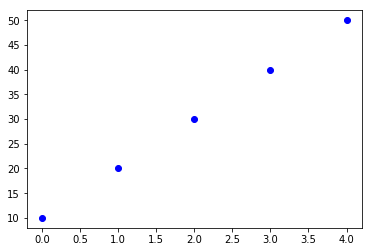

In [5]:
# Let's plot the data used above
# You begin by calling the plot() function and then pass your x and y arguments

plt.plot(x, y, 'bo')      # 'bo' is a magic argument that says that I want 'o' markers with color blue (b)

### Axis labels and title

Text(0.5,1,'My first plot')

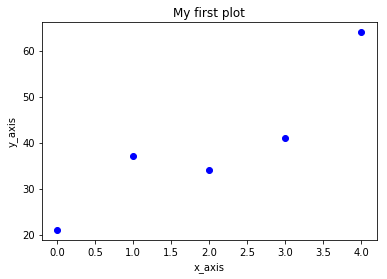

In [6]:
# Let's style it a bit

plt.plot(x, y_noise, 'bo')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title("My first plot")

### Multiple plots

Text(0.5,1,'My first mutltiple plot')

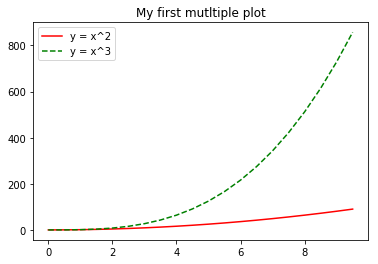

In [7]:
# You can add more plots in the same figure

x = np.arange(0, 10, 0.5)
y1 = x ** 2
y2 = x ** 3

plt.plot(x, y1, 'r-', label='y = x^2')
plt.plot(x, y2, 'g--', label='y = x^3')
plt.legend()
plt.title("My first mutltiple plot")

## Increase control with `subplots`

Let's have more control on the figure. We can use the `subplots` method that allow us to set the size of the figure. 
`subplots` returns 2 element, the figure (think of it as the image frame) and the `axis`, which is the Matplotlib classes that contains the various plotting objects.  
You can find more on `subplots` [reading here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib-pyplot-subplots).

Text(0,0.5,'y')

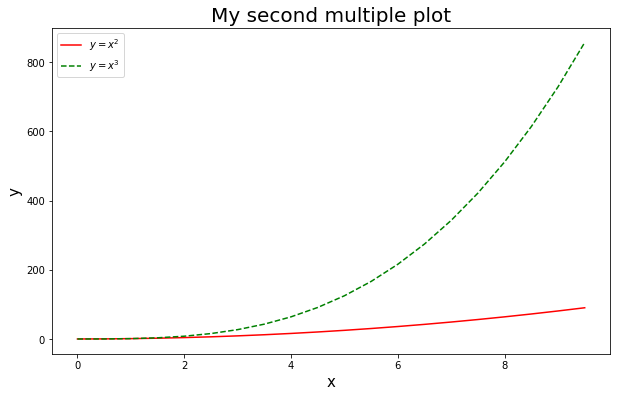

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))     # We are increasing the size of the figure!

ax.plot(x, y1, 'r-', label= r'$y = x^2$')   # this special string having an outside r and 
ax.plot(x, y2, 'g--', label= r'$y = x^3$')  # starting and ending with dollar sign gives us Latex functionality
ax.legend()
ax.set_title("My second multiple plot", fontsize=20)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

### Formatting the legend
Here we list some of the many ways to control the legend position.  
```python
ax.legend((loc=0))  # let matplotlib decide the optimal location# let ma 
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
```

### More on lines and markers styling

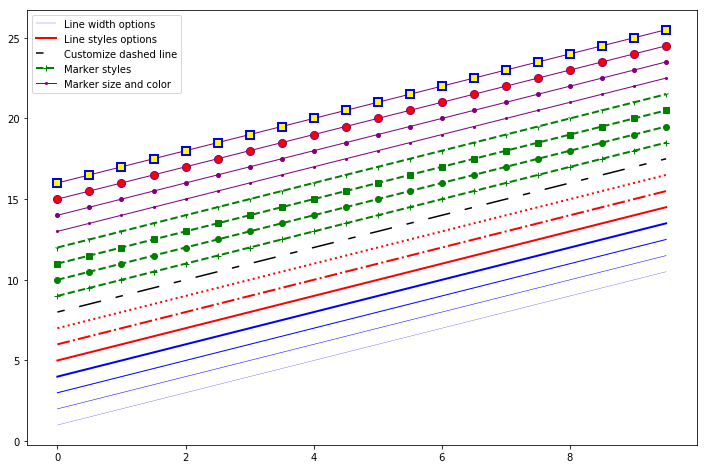

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(x, x+1, color="blue", linewidth=0.25, label='Line width options')
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-', label='Line styles options')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50, label='Customize dashed line')
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+', label='Marker styles')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2, label='Marker size and color')
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

ax.legend(loc=2);

## Plot range and multiple axis
Here we see how to modify plot ranges and how to insert multiple graphs in one figure.  
The latter procedure is done by giving `nrows` and `ncols` parameters to `subplots()` function: in this way you are dividing the figure in `nrows`x`ncols` parts, each of them holding a plot.  
These parts are called **`axes`**. They are returned by the `subplot()` function as an array; it can be 1 or 2-dimensional.  

To modify the plot range, you can use the functions `set_ylim` and `set_xlim`.

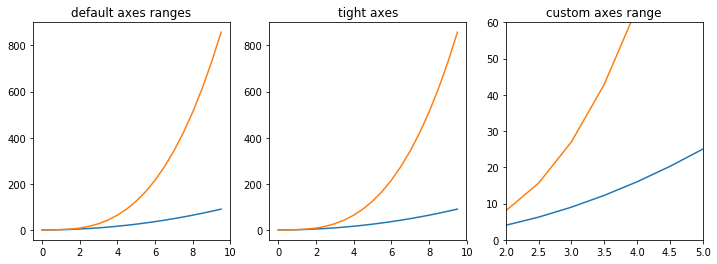

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # we're creating more plots!!

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])                # this limits the y axis range
axes[2].set_xlim([2, 5])                 # this limits the x axis range
axes[2].set_title("custom axes range");

## Logarithmic scale

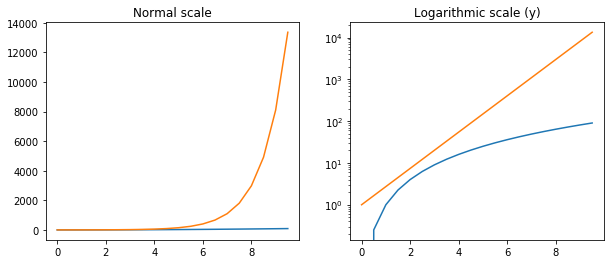

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

## Histograms

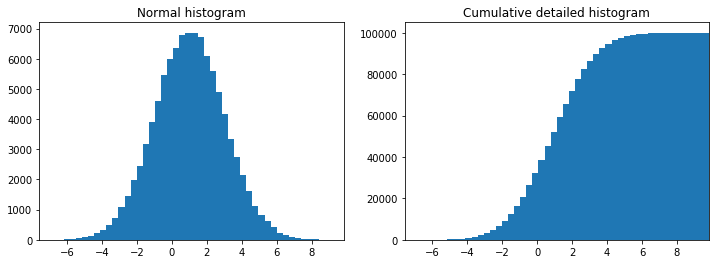

In [12]:
n = np.random.normal(1, 2, 100000)               # generate data from normal distribution
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n, bins=50)              
axes[0].set_title("Normal histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

## Other 2d plots

Text(0.5,1,'bar')

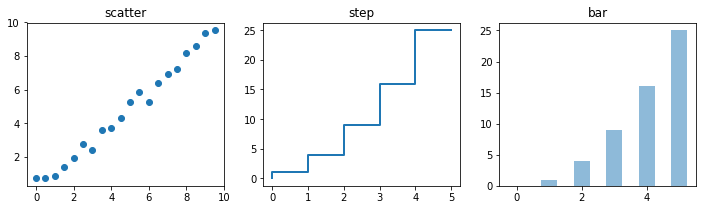

In [42]:


n = np.arange(0, 6)
fig, axes = plt.subplots(1, 3, figsize=(12,3))

axes[0].scatter(x, x + 0.5*np.random.randn(len(x)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")